In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-churners-prediction/Bank Churners predictions.ipynb
/kaggle/input/bankchurnerscsv/BankChurners.csv
/kaggle/input/credit-card-customers/BankChurners.csv


In [2]:
# import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",30)


pd.set_option("display.max_columns", 100)
pd.set_option('display.width', 1000)

path = '/kaggle/input/credit-card-customers/BankChurners.csv'
df = pd.read_csv(path)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.003294


In [6]:
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1,inplace=True)

In [7]:
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1,inplace=True)

In [8]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:
for column in df.columns:
    print(f'{column}:{df[column].values}')

CLIENTNUM:[768805383 818770008 713982108 ... 716506083 717406983 714337233]
Attrition_Flag:['Existing Customer' 'Existing Customer' 'Existing Customer' ...
 'Attrited Customer' 'Attrited Customer' 'Attrited Customer']
Customer_Age:[45 49 51 ... 44 30 43]
Gender:['M' 'F' 'M' ... 'F' 'M' 'F']
Dependent_count:[3 5 3 ... 1 2 2]
Education_Level:['High School' 'Graduate' 'Graduate' ... 'High School' 'Graduate'
 'Graduate']
Marital_Status:['Married' 'Single' 'Married' ... 'Married' 'Unknown' 'Married']
Income_Category:['$60K - $80K' 'Less than $40K' '$80K - $120K' ... 'Less than $40K'
 '$40K - $60K' 'Less than $40K']
Card_Category:['Blue' 'Blue' 'Blue' ... 'Blue' 'Blue' 'Silver']
Months_on_book:[39 44 36 ... 36 36 25]
Total_Relationship_Count:[5 6 4 ... 5 4 6]
Months_Inactive_12_mon:[1 1 1 ... 3 3 2]
Contacts_Count_12_mon:[3 2 0 ... 4 3 4]
Credit_Limit:[12691.  8256.  3418. ...  5409.  5281. 10388.]
Total_Revolving_Bal:[ 777  864    0 ...    0    0 1961]
Avg_Open_To_Buy:[11914.  7392.  3418. 

In [11]:
df=df.replace('Unknown',np.nan)

In [12]:
df['Education_Level']=df['Education_Level'].fillna(df['Education_Level'].mode()[0])

In [13]:
df['Marital_Status']=df['Marital_Status'].fillna(df['Marital_Status'].mode()[0])

In [14]:
df['Income_Category']=df['Income_Category'].fillna(df['Income_Category'].mode()[0])

In [15]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# Explorative Data Analysis¶

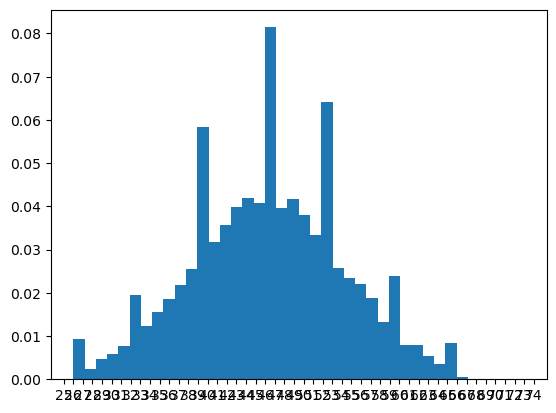

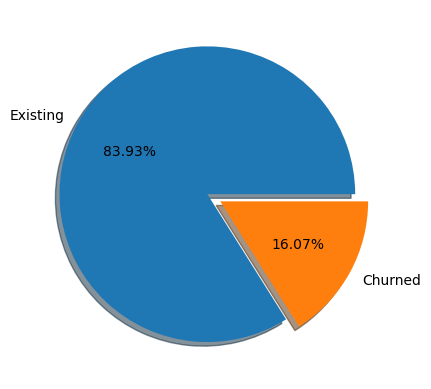

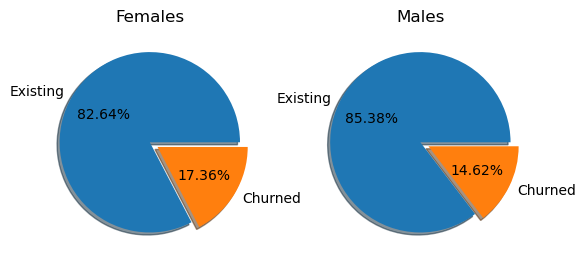

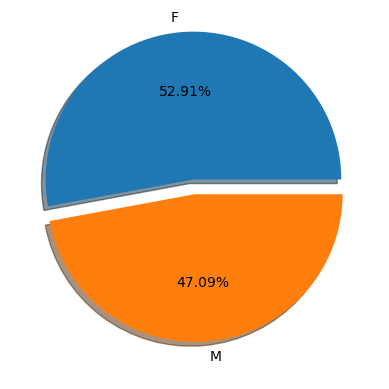

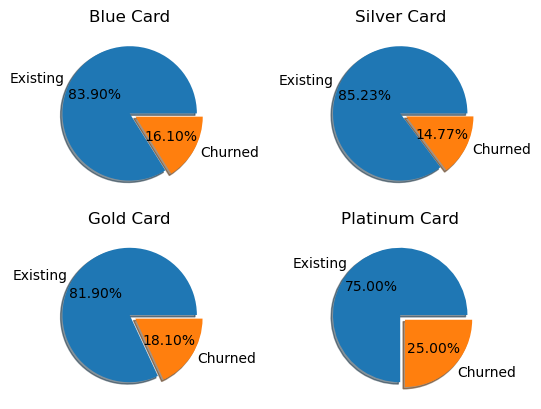

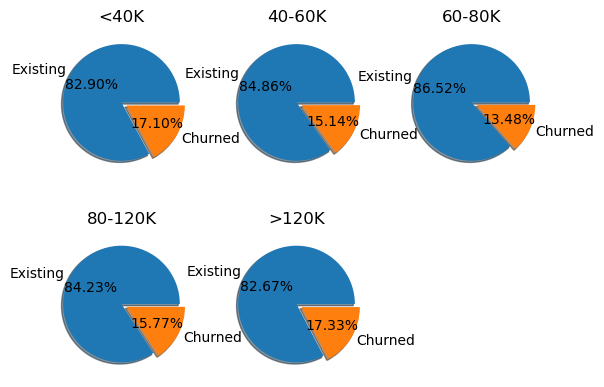

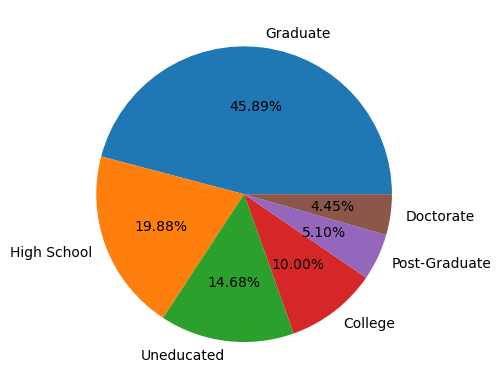

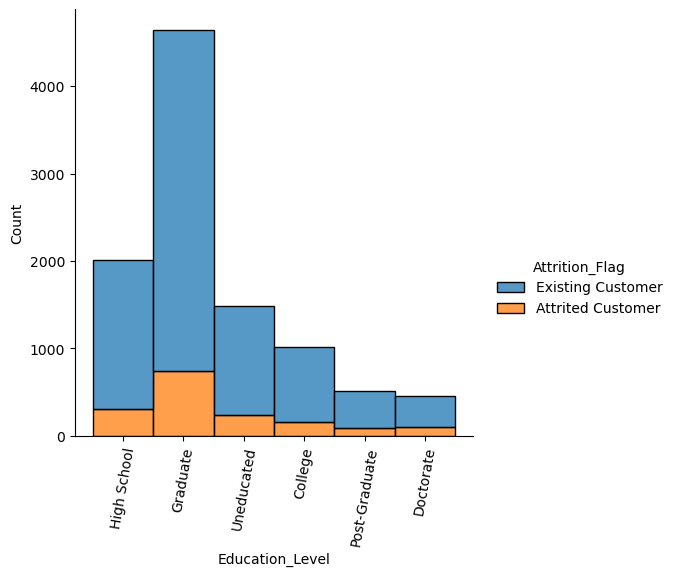

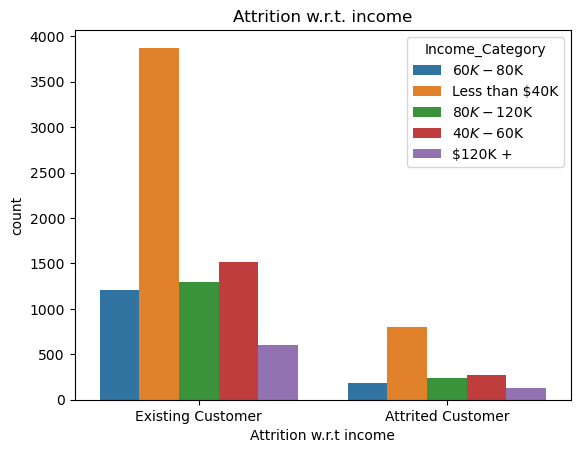

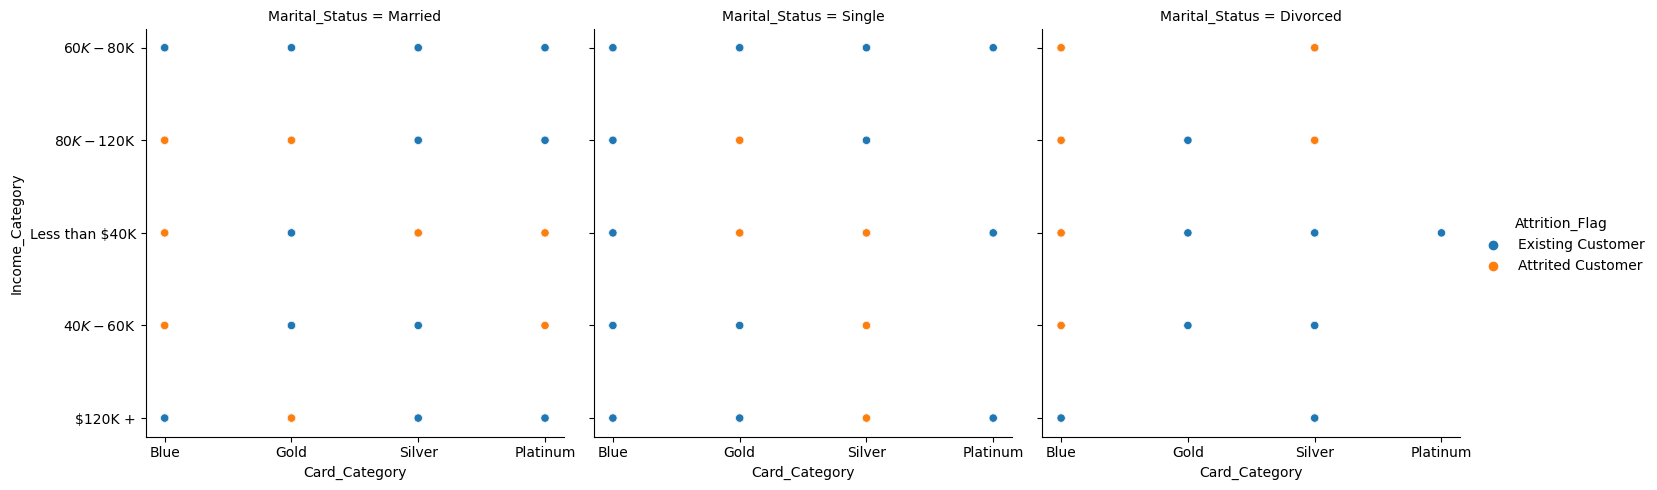

In [16]:
# EDA
plt.hist(df['Customer_Age'],bins=40,density=True)   
plt.xticks(range(25,75,1))
plt.show()
#Interpretation- Age distribution curve shows normal distribution
sizes = (df['Attrition_Flag'].value_counts()).tolist()
plt.pie(sizes,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
plt.show()
#Interpretation- 16% customers found churned

#gender based division
sizes_f = df.loc[df['Gender']=='F']['Attrition_Flag'].value_counts()
sizes_m = df.loc[df['Gender']=='M']['Attrition_Flag'].value_counts()
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.pie(sizes_f,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
ax1.title.set_text('Females')
ax2.pie(sizes_m,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
ax2.title.set_text('Males')
plt.show()

sizes_gender = df['Gender'].value_counts()    
plt.pie(sizes_gender.tolist(),autopct='%1.2f%%',labels=sizes_gender.index.values,explode=[0.1,0],shadow=True)
plt.show()
#Interpretation- Gender it's eually distributed.

#card category based
sizes_b = df.loc[df['Card_Category']=='Blue']['Attrition_Flag'].value_counts().tolist()
sizes_s = df.loc[df['Card_Category']=='Silver']['Attrition_Flag'].value_counts().tolist()
sizes_g = df.loc[df['Card_Category']=='Gold']['Attrition_Flag'].value_counts().tolist()
sizes_p = df.loc[df['Card_Category']=='Platinum']['Attrition_Flag'].value_counts().tolist()
fig,((axs0, axs1), (axs2, axs3)) = plt.subplots(2,2)
axs0.pie(sizes_b,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
axs0.title.set_text('Blue Card')
axs1.pie(sizes_s,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
axs1.title.set_text('Silver Card')
axs2.pie(sizes_g,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
axs2.title.set_text('Gold Card')
axs3.pie(sizes_p,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
axs3.title.set_text('Platinum Card')
plt.show()
# Interpretation -Platinum card section founds most churned customer of 25% than other categories

#income category based

sizes_0 = df.loc[df['Income_Category']=='Less than $40K']['Attrition_Flag'].value_counts().tolist()
sizes_40 = df.loc[df['Income_Category']=='$40K - $60K']['Attrition_Flag'].value_counts().tolist()
sizes_60 = df.loc[df['Income_Category']=='$60K - $80K']['Attrition_Flag'].value_counts().tolist()
sizes_80 = df.loc[df['Income_Category']=='$80K - $120K']['Attrition_Flag'].value_counts().tolist()
sizes_120 = df.loc[df['Income_Category']=='$120K +']['Attrition_Flag'].value_counts().tolist()
sizes_unkn = df.loc[df['Income_Category'] == 'Unknown']['Attrition_Flag'].value_counts().tolist()
labels_unkn = ['Existing', 'Churned']

fig, ((axs0, axs1, axs2), (axs3, axs4, axs5)) = plt.subplots(2, 3)
axs0.pie(sizes_0, explode=[0, 0.1], shadow=True, autopct='%1.2f%%', labels=['Existing', 'Churned'])
axs0.title.set_text('<40K')
axs1.pie(sizes_40, explode=[0, 0.1], shadow=True, autopct='%1.2f%%', labels=['Existing', 'Churned'])
axs1.title.set_text('40-60K')
axs2.pie(sizes_60, explode=[0, 0.1], shadow=True, autopct='%1.2f%%', labels=['Existing', 'Churned'])
axs2.title.set_text('60-80K')
axs3.pie(sizes_80, explode=[0, 0.1], shadow=True, autopct='%1.2f%%', labels=['Existing', 'Churned'])
axs3.title.set_text('80-120K')
axs4.pie(sizes_120, explode=[0, 0.1], shadow=True, autopct='%1.2f%%', labels=['Existing', 'Churned'])
axs4.title.set_text('>120K')

fig.delaxes(axs5)

plt.show()
# Interpretation - salary of <40K and >120K customers found most churned than other salary ranges

#-education based
sizes_edu = df['Education_Level'].value_counts()
plt.pie(sizes_edu.tolist(),labels=sizes_edu.index.values,autopct='%1.2f%%')
plt.show()
sns.displot(x='Education_Level',data=df,bins=7, color='g', hue='Attrition_Flag',multiple= 'stack')
plt.xticks(rotation=80)
plt.show()
# Interpretation- Graduates found most churned than other categories




sns.countplot(x='Attrition_Flag',data=df,hue="Income_Category")
plt.xlabel("Attrition w.r.t income")
plt.title("Attrition w.r.t. income")
# interpretation -less than 40k salaried are the most existing and attrited customers


sns.relplot(x="Card_Category",y="Income_Category",data=df,hue="Attrition_Flag",col='Marital_Status')
# interpretation - Married status and divorced of blue card holders in salary income from <40k to 120k found most attrited customers 
                 #-in Singles <40 k to 120K found most attrited 

# Outliers Treatment by Capping Method

In [17]:
df5=df.copy()

In [18]:
num_cols=df5.select_dtypes('number').columns
num_cols

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], dtype='object')

In [19]:
Q1=df5[num_cols].quantile(0.25)
Q3=df5[num_cols].quantile(0.75)
IQR=Q3-Q1
upper_fence=Q3+1.5*IQR
lower_fence=Q1-1.5*IQR
print('upper fence\n',upper_fence)
print('lower fence\n',lower_fence)

upper fence
 CLIENTNUM                   8.633037e+08
Customer_Age                6.850000e+01
Dependent_count             6.000000e+00
Months_on_book              5.350000e+01
Total_Relationship_Count    8.000000e+00
Months_Inactive_12_mon      4.500000e+00
Contacts_Count_12_mon       4.500000e+00
Credit_Limit                2.383625e+04
Total_Revolving_Bal         3.921500e+03
Avg_Open_To_Buy             2.266075e+04
Total_Amt_Chng_Q4_Q1        1.201000e+00
Total_Trans_Amt             8.619250e+03
Total_Trans_Ct              1.350000e+02
Total_Ct_Chng_Q4_Q1         1.172000e+00
Avg_Utilization_Ratio       1.223000e+00
dtype: float64
lower fence
 CLIENTNUM                   6.228766e+08
Customer_Age                2.450000e+01
Dependent_count            -2.000000e+00
Months_on_book              1.750000e+01
Total_Relationship_Count    0.000000e+00
Months_Inactive_12_mon      5.000000e-01
Contacts_Count_12_mon       5.000000e-01
Credit_Limit               -1.021375e+04
Total_Revolving_

In [20]:
df5[num_cols]=np.where(df5[num_cols]>upper_fence,upper_fence,np.where(df5[num_cols]<lower_fence,lower_fence,df5[num_cols]))

In [21]:
df5.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325368,2.346203,35.945394,3.812580,2.315444,2.458329,7882.309381,1162.814061,6720.676247,0.751387,3948.349561,64.858003,0.703484,0.274894
std,3.690378e+07,8.015036,1.298908,7.773496,1.554408,0.930323,1.025784,7217.091225,814.987335,7223.542192,0.184542,2161.970455,23.470452,0.197203,0.275691
min,7.080821e+08,26.000000,0.000000,17.500000,1.000000,0.500000,0.500000,1438.300000,0.000000,3.000000,0.289000,510.000000,10.000000,0.228000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,68.500000,5.000000,53.500000,6.000000,4.500000,4.500000,23836.250000,2517.000000,22660.750000,1.201000,8619.250000,135.000000,1.172000,0.999000


In [22]:
cat_cols=df5.select_dtypes('object').columns
cat_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], dtype='object')

# One Hot label Encoding

In [23]:
df6=df5.copy()

In [24]:
df6=pd.get_dummies(df6,columns=[ 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],drop_first=True)

In [25]:
df6.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383.0,Existing Customer,45.0,3.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1.201,1144.0,42.0,1.172,0.061,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,818770008.0,Existing Customer,49.0,5.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1.201,1291.0,33.0,1.172,0.105,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,713982108.0,Existing Customer,51.0,3.0,36.0,4.0,1.0,0.5,3418.0,0.0,3418.0,1.201,1887.0,20.0,1.172,0.000,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,769911858.0,Existing Customer,40.0,4.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1.201,1171.0,20.0,1.172,0.760,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,709106358.0,Existing Customer,40.0,3.0,21.0,5.0,1.0,0.5,4716.0,0.0,4716.0,1.201,816.0,28.0,1.172,0.000,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0


# Statistical Data- Degree of Skewness and Kurtosis

In [26]:
df7=df6.copy()

In [27]:
df7.skew()

CLIENTNUM                          0.995601
Customer_Age                      -0.035409
Dependent_count                   -0.020826
Months_on_book                    -0.063500
Total_Relationship_Count          -0.162452
Months_Inactive_12_mon             0.135221
Contacts_Count_12_mon             -0.033061
Credit_Limit                       1.197249
Total_Revolving_Bal               -0.148837
Avg_Open_To_Buy                    1.190498
Total_Amt_Chng_Q4_Q1               0.329036
Total_Trans_Amt                    0.837030
Total_Trans_Ct                     0.152973
Total_Ct_Chng_Q4_Q1                0.129075
Avg_Utilization_Ratio              0.718008
Gender_M                           0.116537
Education_Level_Doctorate          4.416665
Education_Level_Graduate           0.165095
Education_Level_High School        1.509823
Education_Level_Post-Graduate      4.084679
Education_Level_Uneducated         1.995907
Marital_Status_Married            -0.147553
Marital_Status_Single           

In [28]:
df7.kurt()

CLIENTNUM                          -0.615640
Customer_Age                       -0.294289
Dependent_count                    -0.683017
Months_on_book                      0.071256
Total_Relationship_Count           -1.006131
Months_Inactive_12_mon             -0.592287
Contacts_Count_12_mon              -0.774938
Credit_Limit                        0.085967
Total_Revolving_Bal                -1.145992
Avg_Open_To_Buy                     0.067205
Total_Amt_Chng_Q4_Q1                0.131033
Total_Trans_Amt                    -0.025300
Total_Trans_Ct                     -0.369589
Total_Ct_Chng_Q4_Q1                 0.090811
Avg_Utilization_Ratio              -0.794972
Gender_M                           -1.986811
Education_Level_Doctorate          17.510392
Education_Level_Graduate           -1.973134
Education_Level_High School         0.279620
Education_Level_Post-Graduate      14.687501
Education_Level_Uneducated          1.984035
Marital_Status_Married             -1.978619
Marital_St

# degree of skewness is more than +/-3¶
# degree of kurtossis is more than +/-8
# hence data is non parameteric

In [29]:
# Data is non parametric hence to verify corellation between columns 'spearman' method is adopted
corr_matrix=df7.corr(method='spearman')
corr_matrix

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
CLIENTNUM,1.000000,0.017488,-0.004093,0.110506,0.013798,-0.008302,0.011409,0.014320,0.003220,0.011137,0.023809,-0.002247,0.006442,0.016461,0.006647,0.020265,-0.003093,0.008247,-0.012811,0.002863,-0.011274,0.002111,-0.006239,0.011935,-0.000201,0.018620,-0.029178,-0.005892,-0.015007,0.005799
Customer_Age,0.017488,1.000000,-0.143583,0.768884,-0.014495,0.044391,-0.014361,0.002326,0.013551,-0.002326,-0.070563,-0.038919,-0.053851,-0.040390,0.010562,-0.017462,0.023070,0.001766,-0.000574,-0.015361,0.004176,0.028576,-0.008117,-0.020236,-0.022843,0.007522,-0.002353,-0.012499,0.007403,-0.020392
Dependent_count,-0.004093,-0.143583,1.000000,-0.114860,-0.035726,-0.009118,-0.041359,0.050350,-0.003574,0.054212,-0.026332,0.058091,0.052897,0.009435,-0.034930,0.004878,-0.003563,0.002958,-0.011438,0.010094,0.001342,0.033964,-0.040022,-0.013272,0.027814,0.048164,-0.054726,0.027844,0.005245,0.018150
Months_on_book,0.110506,0.768884,-0.114860,1.000000,-0.014017,0.057406,-0.008212,0.006806,0.006307,0.007617,-0.054401,-0.028858,-0.038771,-0.033911,-0.003617,-0.009380,0.022899,-0.002982,0.001577,-0.011222,0.002212,0.019076,-0.005087,-0.008718,-0.023844,0.009883,-0.004706,-0.006106,0.001729,-0.014096
Total_Relationship_Count,0.013798,-0.014495,-0.035726,-0.014017,1.000000,-0.006674,0.061027,-0.058496,0.011651,-0.070172,0.025697,-0.280052,-0.226808,0.024278,0.065487,0.002979,-0.009356,0.001847,-0.001461,0.012083,0.009414,0.011033,-0.016220,-0.009286,0.005700,0.001923,0.005061,-0.054682,-0.043123,-0.058461
Months_Inactive_12_mon,-0.008302,0.044391,-0.009118,0.057406,-0.006674,1.000000,0.030260,-0.027285,-0.042542,-0.015462,-0.018667,-0.031560,-0.050832,-0.046584,-0.026531,-0.007096,-0.000387,-0.006903,-0.005569,-0.003382,0.011004,-0.015212,0.015485,-0.022998,-0.001405,-0.002596,0.022234,-0.004695,-0.002877,-0.013289
Contacts_Count_12_mon,0.011409,-0.014361,-0.041359,-0.008212,0.061027,0.030260,1.000000,0.022768,-0.044691,0.032934,-0.020812,-0.167226,-0.168386,-0.093219,-0.058643,0.037927,-0.003219,0.004989,-0.002762,-0.007936,0.010011,-0.002102,0.006967,-0.002172,-0.001444,0.014279,-0.017697,-0.004571,0.002377,-0.005117
Credit_Limit,0.014320,0.002326,0.050350,0.006806,-0.058496,-0.027285,0.022768,1.000000,0.131033,0.931383,0.020949,0.027297,0.033052,-0.011423,-0.416874,0.441941,-0.008293,-0.006596,0.006640,0.004028,0.007465,-0.029163,0.017622,-0.114701,0.149874,0.307962,-0.376712,0.154316,0.065963,0.324987
Total_Revolving_Bal,0.003220,0.013551,-0.003574,0.006307,0.011651,-0.042542,-0.044691,0.131033,1.000000,-0.151870,0.036120,0.016919,0.040185,0.078180,0.708607,0.029733,-0.021291,-0.003001,0.020489,0.008636,-0.004396,0.037523,-0.037771,0.005057,-0.004650,0.022807,-0.028037,0.024415,0.007926,0.014319
Avg_Open_To_Buy,0.011137,-0.002326,0.054212,0.007617,-0.070172,-0.015462,0.032934,0.931383,-0.151870,1.000000,0.006630,0.021668,0.020986,-0.039914,-0.685238,0.429476,-0.001107,-0.009457,0.001836,0.000757,0.009927,-0.039232,0.026776,-0.116974,0.147941,0.299919,-0.365508,0.152721,0.066100,0.325027


<Axes: >

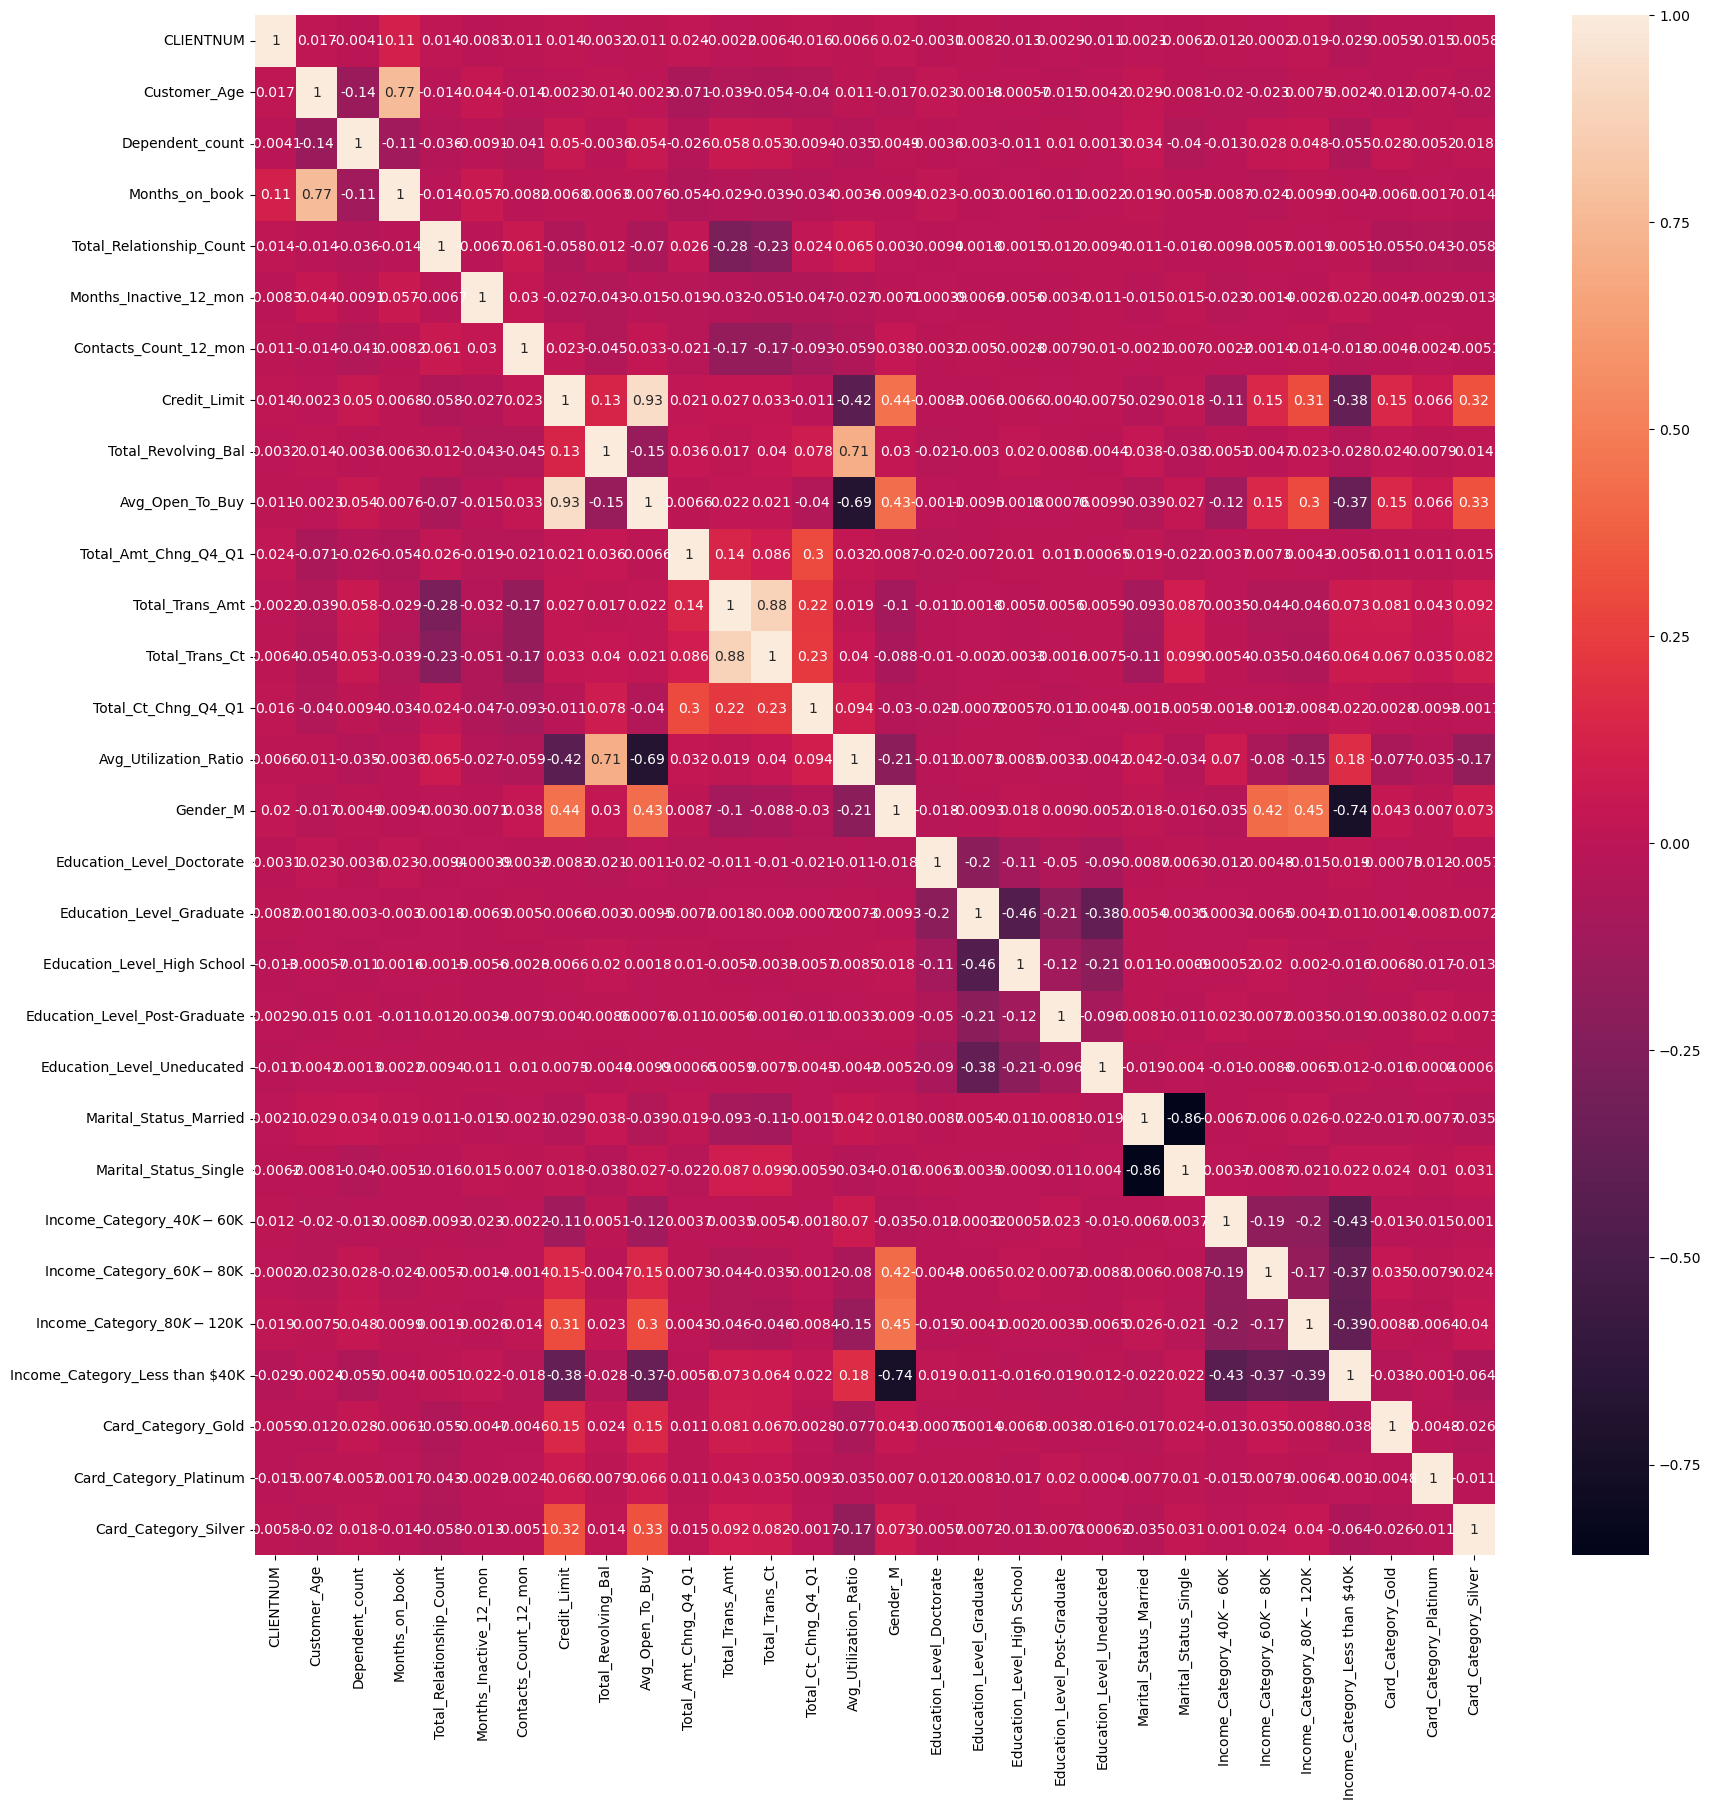

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True)

In [31]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
upper

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
CLIENTNUM,NaN,0.017488,-0.004093,0.110506,0.013798,-0.008302,0.011409,0.014320,0.003220,0.011137,0.023809,-0.002247,0.006442,0.016461,0.006647,0.020265,-0.003093,0.008247,-0.012811,0.002863,-0.011274,0.002111,-0.006239,0.011935,-0.000201,0.018620,-0.029178,-0.005892,-0.015007,0.005799
Customer_Age,NaN,NaN,-0.143583,0.768884,-0.014495,0.044391,-0.014361,0.002326,0.013551,-0.002326,-0.070563,-0.038919,-0.053851,-0.040390,0.010562,-0.017462,0.023070,0.001766,-0.000574,-0.015361,0.004176,0.028576,-0.008117,-0.020236,-0.022843,0.007522,-0.002353,-0.012499,0.007403,-0.020392
Dependent_count,NaN,NaN,NaN,-0.114860,-0.035726,-0.009118,-0.041359,0.050350,-0.003574,0.054212,-0.026332,0.058091,0.052897,0.009435,-0.034930,0.004878,-0.003563,0.002958,-0.011438,0.010094,0.001342,0.033964,-0.040022,-0.013272,0.027814,0.048164,-0.054726,0.027844,0.005245,0.018150
Months_on_book,NaN,NaN,NaN,NaN,-0.014017,0.057406,-0.008212,0.006806,0.006307,0.007617,-0.054401,-0.028858,-0.038771,-0.033911,-0.003617,-0.009380,0.022899,-0.002982,0.001577,-0.011222,0.002212,0.019076,-0.005087,-0.008718,-0.023844,0.009883,-0.004706,-0.006106,0.001729,-0.014096
Total_Relationship_Count,NaN,NaN,NaN,NaN,NaN,-0.006674,0.061027,-0.058496,0.011651,-0.070172,0.025697,-0.280052,-0.226808,0.024278,0.065487,0.002979,-0.009356,0.001847,-0.001461,0.012083,0.009414,0.011033,-0.016220,-0.009286,0.005700,0.001923,0.005061,-0.054682,-0.043123,-0.058461
Months_Inactive_12_mon,NaN,NaN,NaN,NaN,NaN,NaN,0.030260,-0.027285,-0.042542,-0.015462,-0.018667,-0.031560,-0.050832,-0.046584,-0.026531,-0.007096,-0.000387,-0.006903,-0.005569,-0.003382,0.011004,-0.015212,0.015485,-0.022998,-0.001405,-0.002596,0.022234,-0.004695,-0.002877,-0.013289
Contacts_Count_12_mon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022768,-0.044691,0.032934,-0.020812,-0.167226,-0.168386,-0.093219,-0.058643,0.037927,-0.003219,0.004989,-0.002762,-0.007936,0.010011,-0.002102,0.006967,-0.002172,-0.001444,0.014279,-0.017697,-0.004571,0.002377,-0.005117
Credit_Limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.131033,0.931383,0.020949,0.027297,0.033052,-0.011423,-0.416874,0.441941,-0.008293,-0.006596,0.006640,0.004028,0.007465,-0.029163,0.017622,-0.114701,0.149874,0.307962,-0.376712,0.154316,0.065963,0.324987
Total_Revolving_Bal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.151870,0.036120,0.016919,0.040185,0.078180,0.708607,0.029733,-0.021291,-0.003001,0.020489,0.008636,-0.004396,0.037523,-0.037771,0.005057,-0.004650,0.022807,-0.028037,0.024415,0.007926,0.014319
Avg_Open_To_Buy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006630,0.021668,0.020986,-0.039914,-0.685238,0.429476,-0.001107,-0.009457,0.001836,0.000757,0.009927,-0.039232,0.026776,-0.116974,0.147941,0.299919,-0.365508,0.152721,0.066100,0.325027


<Axes: >

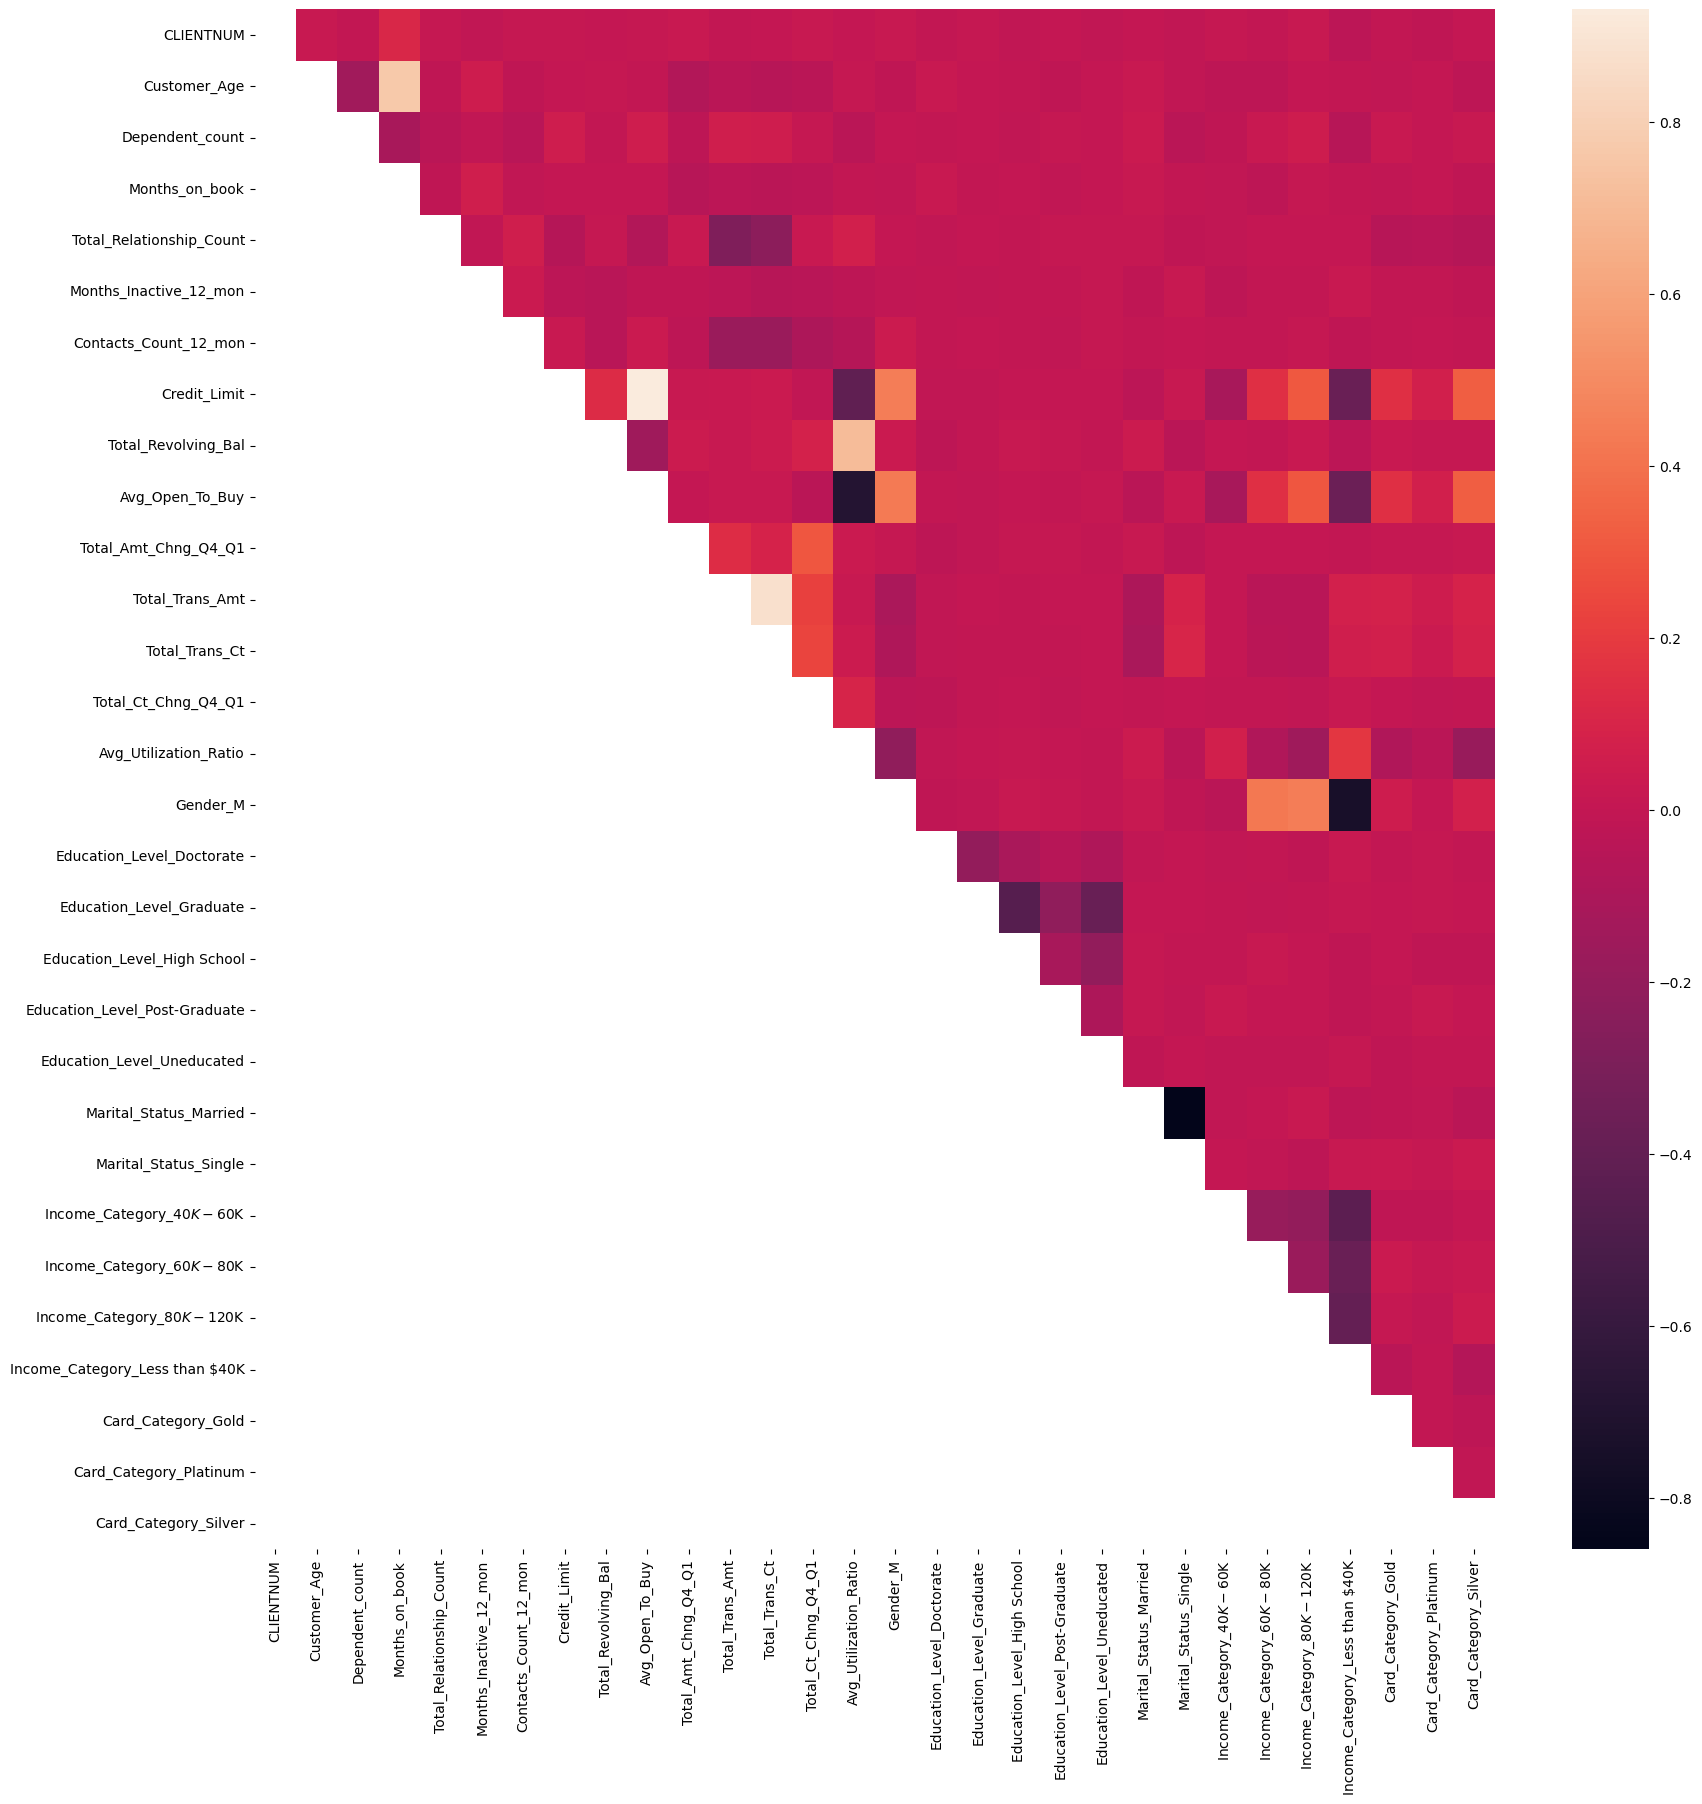

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(upper)

# Highly co-related columns

In [33]:
high_positive_corr=[column for column in upper.columns if any (upper[column]>=0.8)]
high_negative_corr=[column for column in upper.columns if any (upper[column]<=-0.8)]
print('high positive correlation\n',high_positive_corr)
print('high negative correlation\n',high_negative_corr)

high positive correlation
 ['Avg_Open_To_Buy', 'Total_Trans_Ct']
high negative correlation
 ['Marital_Status_Single']


In [34]:
all_drop=high_positive_corr+high_negative_corr
all_drop

['Avg_Open_To_Buy', 'Total_Trans_Ct', 'Marital_Status_Single']

In [35]:
df7.drop(all_drop,axis=1)
df7.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383.0,Existing Customer,45.0,3.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1.201,1144.0,42.0,1.172,0.061,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,818770008.0,Existing Customer,49.0,5.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1.201,1291.0,33.0,1.172,0.105,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,713982108.0,Existing Customer,51.0,3.0,36.0,4.0,1.0,0.5,3418.0,0.0,3418.0,1.201,1887.0,20.0,1.172,0.000,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,769911858.0,Existing Customer,40.0,4.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1.201,1171.0,20.0,1.172,0.760,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,709106358.0,Existing Customer,40.0,3.0,21.0,5.0,1.0,0.5,4716.0,0.0,4716.0,1.201,816.0,28.0,1.172,0.000,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0


In [36]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CLIENTNUM                       10127 non-null  float64
 1   Attrition_Flag                  10127 non-null  object 
 2   Customer_Age                    10127 non-null  float64
 3   Dependent_count                 10127 non-null  float64
 4   Months_on_book                  10127 non-null  float64
 5   Total_Relationship_Count        10127 non-null  float64
 6   Months_Inactive_12_mon          10127 non-null  float64
 7   Contacts_Count_12_mon           10127 non-null  float64
 8   Credit_Limit                    10127 non-null  float64
 9   Total_Revolving_Bal             10127 non-null  float64
 10  Avg_Open_To_Buy                 10127 non-null  float64
 11  Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 12  Total_Trans_Amt                 

In [37]:
df7['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [38]:
df7['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [39]:
df7['Attrition_Flag']=df7['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1})
df7.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383.0,0,45.0,3.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1.201,1144.0,42.0,1.172,0.061,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,818770008.0,0,49.0,5.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1.201,1291.0,33.0,1.172,0.105,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,713982108.0,0,51.0,3.0,36.0,4.0,1.0,0.5,3418.0,0.0,3418.0,1.201,1887.0,20.0,1.172,0.000,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,769911858.0,0,40.0,4.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1.201,1171.0,20.0,1.172,0.760,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,709106358.0,0,40.0,3.0,21.0,5.0,1.0,0.5,4716.0,0.0,4716.0,1.201,816.0,28.0,1.172,0.000,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0


In [40]:
float_cols=df7.select_dtypes('float64').columns
float_cols

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], dtype='object')

In [41]:
df7[float_cols]=df7[float_cols].astype('int')
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   CLIENTNUM                       10127 non-null  int64
 1   Attrition_Flag                  10127 non-null  int64
 2   Customer_Age                    10127 non-null  int64
 3   Dependent_count                 10127 non-null  int64
 4   Months_on_book                  10127 non-null  int64
 5   Total_Relationship_Count        10127 non-null  int64
 6   Months_Inactive_12_mon          10127 non-null  int64
 7   Contacts_Count_12_mon           10127 non-null  int64
 8   Credit_Limit                    10127 non-null  int64
 9   Total_Revolving_Bal             10127 non-null  int64
 10  Avg_Open_To_Buy                 10127 non-null  int64
 11  Total_Amt_Chng_Q4_Q1            10127 non-null  int64
 12  Total_Trans_Amt                 10127 non-null  int64
 13  T

# splitting of data into indepented(X) and dependent(Y) variables

In [42]:
X=df7.drop('Attrition_Flag',axis=1)
Y=df7['Attrition_Flag']

In [43]:
X.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,45,3,39,5,1,3,12691,777,11914,1,1144,42,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,818770008,49,5,44,6,1,2,8256,864,7392,1,1291,33,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,713982108,51,3,36,4,1,0,3418,0,3418,1,1887,20,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,769911858,40,4,34,3,4,1,3313,2517,796,1,1171,20,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,709106358,40,3,21,5,1,0,4716,0,4716,1,816,28,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0


In [44]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64

In [45]:
Y.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

# Scaling of independent Variables data¶

In [46]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [47]:
scaler=MinMaxScaler()

In [48]:
X_scaled=scaler.fit_transform(X)

In [49]:
X_scaled

array([[0.50492928, 0.45238095, 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.92039751, 0.54761905, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04906017, 0.5952381 , 0.6       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07004765, 0.42857143, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.07753885, 0.0952381 , 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.05201312, 0.4047619 , 0.4       , ..., 0.        , 0.        ,
        1.        ]])

In [50]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.504929,0.452381,0.6,0.611111,0.8,0.25,0.75,0.502411,0.308701,0.525709,1.0,0.078185,0.256,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.920398,0.547619,1.0,0.750000,1.0,0.25,0.50,0.304402,0.343266,0.326124,1.0,0.096313,0.184,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.049060,0.595238,0.6,0.527778,0.6,0.25,0.00,0.088401,0.000000,0.150726,1.0,0.169811,0.080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.514130,0.333333,0.8,0.472222,0.4,1.00,0.25,0.083713,1.000000,0.035000,1.0,0.081514,0.080,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.008517,0.333333,0.6,0.111111,0.8,0.25,0.00,0.146352,0.000000,0.208015,1.0,0.037736,0.144,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Splitting of data into Train and Test data

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.20,random_state=100,stratify=Y)

In [53]:
X_train.shape

(8101, 30)

In [54]:
X_test.shape

(2026, 30)

# model building,Training and testing and model evaluation of dataset by Logistic Regression, Support Vector Matrix, GaussioanNB, KNN, DecisionTree, RandomForest, and BaggingClassifier

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score,roc_curve,recall_score,precision_score

In [56]:
lr=LogisticRegression()
support=SVC()
gb=GaussianNB()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
bg=BaggingClassifier()


In [57]:
for model in [lr,support,gb,knn,dt,rf,bg]:
    print('======'*6)
    print('Performance of model',model)
    abc=model.fit(X_train,Y_train)
    Y_predict_train=abc.predict(X_train)
    Y_predict_test=abc.predict(X_test)
    as_train=accuracy_score(Y_train,Y_predict_train)
    as_test=accuracy_score(Y_test,Y_predict_test)
    cm=confusion_matrix(Y_test,Y_predict_test)
    cr=classification_report(Y_test,Y_predict_test)
    rr=recall_score(Y_test,Y_predict_test)
    roc_auc=roc_auc_score(Y_test,Y_predict_test)
    
    print('Training accuracy score\n',as_train)
    print('======'*3)
    print('Test accuracy score\n', as_test)
    print('======'*3)
    print('confusion_matrix\n',cm)
    print('======'*3)
    print('classification report\n',cr)
    print('======'*3)
    print('Recall_Rate\n', rr)
    print('======'*3)
    print('ROC_AUC\n',roc_auc)
    print('======'*3)

Performance of model LogisticRegression()
Training accuracy score
 0.9075422787310209
Test accuracy score
 0.9057255676209279
confusion_matrix
 [[1658   43]
 [ 148  177]]
classification report
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      1701
           1       0.80      0.54      0.65       325

    accuracy                           0.91      2026
   macro avg       0.86      0.76      0.80      2026
weighted avg       0.90      0.91      0.90      2026

Recall_Rate
 0.5446153846153846
ROC_AUC
 0.7596680685569575
Performance of model SVC()
Training accuracy score
 0.9293914331564005
Test accuracy score
 0.9076999012833169
confusion_matrix
 [[1665   36]
 [ 151  174]]
classification report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1701
           1       0.83      0.54      0.65       325

    accuracy                           0.91      2026
   macro avg       0.8

In [58]:
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN,BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss

In [59]:
over=RandomOverSampler()
under=RandomUnderSampler()
SM=SMOTE()

In [60]:
X_train.shape

(8101, 30)

In [61]:
Y_train.value_counts()

0    6799
1    1302
Name: Attrition_Flag, dtype: int64

In [62]:
# oversampling approach
X_train_over,Y_train_over=over.fit_resample(X_train,Y_train)

In [63]:
X_train_over.shape

(13598, 30)

In [64]:
Y_train_over.value_counts()

0    6799
1    6799
Name: Attrition_Flag, dtype: int64

In [65]:
# Undersampling approach
X_train_under,Y_train_under=under.fit_resample(X_train,Y_train)

In [66]:
X_train_under.shape

(2604, 30)

In [67]:
Y_train_under.value_counts()

0    1302
1    1302
Name: Attrition_Flag, dtype: int64

In [68]:
# SMOTE approach
X_train_smote,Y_train_smote=SM.fit_resample(X_train,Y_train)

In [69]:
X_train_smote.shape

(13598, 30)

In [70]:
Y_train_smote.value_counts()

0    6799
1    6799
Name: Attrition_Flag, dtype: int64

#  apply the balancing dataset on model building 
# randomforest model

# Boosting approach

In [71]:
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier, GradientBoostingRegressor

In [72]:
ada=AdaBoostClassifier()
ada.fit(X_train_over,Y_train_over)

AdaBoostClassifier()

In [73]:
Y_predict_ada=ada.predict(X_test)

In [74]:
accuracy_score(Y_test,Y_predict_ada )

0.9234945705824285

In [75]:
print("Recall Rate : ", recall_score(Y_test,Y_predict_ada ) *  100)


Recall Rate :  92.92307692307692


In [76]:
confusion_matrix(Y_test,Y_predict_ada)

array([[1569,  132],
       [  23,  302]])

In [77]:
print(classification_report(Y_test,Y_predict_ada))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1701
           1       0.70      0.93      0.80       325

    accuracy                           0.92      2026
   macro avg       0.84      0.93      0.87      2026
weighted avg       0.94      0.92      0.93      2026



In [78]:
#gradist boosting
gd=GradientBoostingClassifier()

In [79]:
gd.fit(X_train_over,Y_train_over)

GradientBoostingClassifier()

In [80]:
Y_predict_gd=gd.predict(X_test)

In [81]:
accuracy_score(Y_test,Y_predict_gd)

0.9417571569595261

In [82]:
print("Recall Rate : ", recall_score(Y_test,Y_predict_gd ) *  100)


Recall Rate :  92.3076923076923


In [83]:
confusion_matrix(Y_test,Y_predict_gd)

array([[1608,   93],
       [  25,  300]])

In [84]:
print(classification_report(Y_test,Y_predict_gd))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1701
           1       0.76      0.92      0.84       325

    accuracy                           0.94      2026
   macro avg       0.87      0.93      0.90      2026
weighted avg       0.95      0.94      0.94      2026



In [85]:
#gradist boosting
gd=GradientBoostingClassifier()

In [86]:
gd.fit(X_train_over,Y_train_over)

GradientBoostingClassifier()

In [87]:
Y_predict_gd=gd.predict(X_test)

In [88]:
accuracy_score(Y_test,Y_predict_gd)

0.9417571569595261

In [89]:
print("Recall Rate : ", recall_score(Y_test,Y_predict_gd ) *  100)

Recall Rate :  92.3076923076923


In [90]:
confusion_matrix(Y_test,Y_predict_gd)

array([[1608,   93],
       [  25,  300]])

In [91]:
print(classification_report(Y_test,Y_predict_gd))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1701
           1       0.76      0.92      0.84       325

    accuracy                           0.94      2026
   macro avg       0.87      0.93      0.90      2026
weighted avg       0.95      0.94      0.94      2026



In [92]:
#gradist boosting
gd1=GradientBoostingClassifier()

In [93]:
gd1.fit(X_train_under,Y_train_under)

GradientBoostingClassifier()

In [94]:
Y_predict_gd1=gd1.predict(X_test)

In [95]:
accuracy_score(Y_test,Y_predict_gd1)

0.9348469891411648

In [96]:
print("Recall Rate : ", recall_score(Y_test,Y_predict_gd1 ) *  100)

Recall Rate :  93.53846153846153


In [97]:
confusion_matrix(Y_test,Y_predict_gd1)

array([[1590,  111],
       [  21,  304]])

In [98]:
print(classification_report(Y_test,Y_predict_gd1))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1701
           1       0.73      0.94      0.82       325

    accuracy                           0.93      2026
   macro avg       0.86      0.94      0.89      2026
weighted avg       0.95      0.93      0.94      2026



In [99]:
Y_test_probability_score_gd1=gd1.predict_proba(X_test)[:,1]
Y_test_probability_score_gd1

array([0.00462797, 0.99235372, 0.96653163, ..., 0.53158869, 0.02042557,
       0.2737968 ])

In [100]:
Y_test_probability_score_df2=pd.DataFrame(Y_test_probability_score_gd1)
Y_test_probability_score_df2

,0
0,0.004628
1,0.992354
2,0.966532
3,0.983993
4,0.974347
...,...
2021,0.020209
2022,0.336234
2023,0.531589
2024,0.020426


0.9869488536155202


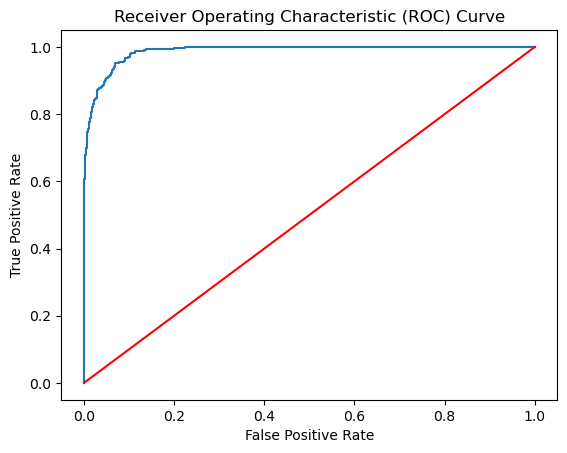

In [101]:
roc_auc=roc_auc_score(Y_test,Y_test_probability_score_gd1)
print(roc_auc)
fpr,tpr,threshold=roc_curve(Y_test,Y_test_probability_score_gd1)
plt.plot(fpr,tpr)
plt.plot([0,1],color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.show()


In [102]:
X_test_new2=X_test.copy()

In [103]:
X_test_new2["Actual_Y"]=Y_test

In [104]:
X_test_new2["Y_predicted"]=Y_predict_gd1

In [105]:
X_test_new2['Y_test_probability']=Y_test_probability_score_gd1

In [106]:
pd.set_option("display.max_rows",500)

In [107]:
X_test_new2.head(100)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Actual_Y,Y_predicted,Y_test_probability
6258,0.041395,0.404762,1.0,0.472222,0.8,0.25,0.75,0.254353,0.462455,0.263406,1.0,0.399063,0.568,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.004628
8177,0.641570,0.452381,1.0,0.611111,0.2,0.75,0.75,0.089338,0.000000,0.151653,0.0,0.265261,0.200,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.992354
2019,0.079676,0.261905,0.6,0.055556,0.2,0.75,1.00,0.074203,1.000000,0.025599,0.0,0.022691,0.016,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.966532
7529,0.039596,0.357143,0.4,0.527778,0.4,0.75,1.00,0.005849,0.102106,0.057775,0.0,0.219263,0.280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.983993
7858,0.025513,0.333333,0.6,0.388889,0.8,0.75,0.50,0.042548,0.000000,0.105398,0.0,0.289431,0.240,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.974347
5592,0.996299,0.666667,0.2,0.916667,0.6,0.00,0.75,0.065809,0.000000,0.128393,0.0,0.241090,0.352,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.569928
1590,0.094374,0.880952,0.0,1.000000,1.0,0.25,1.00,0.075007,0.607072,0.070045,0.0,0.096313,0.112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.021733
5110,0.674737,0.428571,0.2,0.444444,1.0,0.50,0.75,0.157648,0.471593,0.166792,0.0,0.415341,0.576,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.008750
4407,0.708358,0.476190,0.6,0.638889,1.0,0.75,0.50,1.000000,0.000000,1.000000,0.0,0.496979,0.544,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.025355
6036,0.099189,0.261905,0.4,0.194444,1.0,0.50,1.00,0.392356,0.000000,0.451207,0.0,0.213713,0.272,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.957319
